In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../Parameters/')
sys.path.append('../Parameters/Bcd_data/')

import ParametersFromLiterature as prms
import bcd

# Bicoid Data

In [2]:
# This is the bcd data from Thomas Gregor, David Tank, Eric Wieschaus and Bill Bialek, Cell 2007
# the data can be used to replot figure 6 in this paper, kindly obtained from thomas gregor

TGB, meanTGB, varTGB, xs_full, mask = bcd.read_bcd_data('../../Parameters/Bcd_data/TG_normBcd', normalization_mode=1)
stdTGB = np.std(TGB, axis=0)
xs     = xs_full[mask] # 160 points
print('positions:',xs)

rel_conc_bins = np.arange(m.ceil(np.max(TGB[:,mask])*60)+1)/60
print('concentration range:', rel_conc_bins*10000/prms.V_nucleus/(prms.N_Avogadro/(10**24)))

positions: [0.10050251 0.10552764 0.11055276 0.11557789 0.12060302 0.12562814
 0.13065327 0.13567839 0.14070352 0.14572864 0.15075377 0.15577889
 0.16080402 0.16582915 0.17085427 0.1758794  0.18090452 0.18592965
 0.19095477 0.1959799  0.20100503 0.20603015 0.21105528 0.2160804
 0.22110553 0.22613065 0.23115578 0.2361809  0.24120603 0.24623116
 0.25125628 0.25628141 0.26130653 0.26633166 0.27135678 0.27638191
 0.28140704 0.28643216 0.29145729 0.29648241 0.30150754 0.30653266
 0.31155779 0.31658291 0.32160804 0.32663317 0.33165829 0.33668342
 0.34170854 0.34673367 0.35175879 0.35678392 0.36180905 0.36683417
 0.3718593  0.37688442 0.38190955 0.38693467 0.3919598  0.39698492
 0.40201005 0.40703518 0.4120603  0.41708543 0.42211055 0.42713568
 0.4321608  0.43718593 0.44221106 0.44723618 0.45226131 0.45728643
 0.46231156 0.46733668 0.47236181 0.47738693 0.48241206 0.48743719
 0.49246231 0.49748744 0.50251256 0.50753769 0.51256281 0.51758794
 0.52261307 0.52763819 0.53266332 0.53768844 0.54271

## Mean bicoid concentration

Text(9.0, 0.5, 'TF concentration')

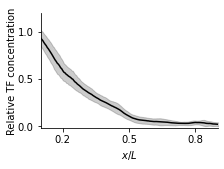

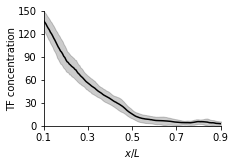

In [19]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.tight_layout(pad=4)

ax.fill_between(xs_full, (meanTGB-stdTGB), (meanTGB+stdTGB), lw=1, color='k', alpha=0.2)
ax.plot(xs_full, meanTGB, color='k')

ax.set_xlabel('$x/L$')
ax.set_xticks([0.2,0.5,0.8])
ax.set_yticks([0.,0.5,1.])
ax.set_ylim([-0.02,1.2])
ax.set_xlim([0.1,0.9])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Relative TF concentration',labelpad=0.3)

fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.tight_layout(pad=4)

ax.fill_between(xs_full, (meanTGB-stdTGB)*10000/prms.V_nucleus/(prms.N_Avogadro/(10**24)), (meanTGB+stdTGB)*10000/prms.V_nucleus/(prms.N_Avogadro/(10**24)), lw=1, color='k', alpha=0.2)
ax.plot(xs_full, meanTGB*10000/prms.V_nucleus/(prms.N_Avogadro/(10**24)), color='k')

ax.set_xlabel('$x/L$')
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
ax.set_yticks(np.linspace(0,150,6)),
ax.set_ylim([-0.1,150])
ax.set_xlim([0.1,0.9])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('TF concentration',labelpad=0.3)

## Standard deviation of relative Bicoid concentration

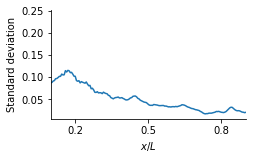

In [21]:
fig, ax = plt.subplots(1,1,figsize=(3.5,2));
ax.plot(np.linspace(0.,1,200), stdTGB)

ax.set_xlabel('$x/L$')
ax.set_ylabel('Standard deviation')
ax.set_xticks([0.2,0.5,0.8])
ax.set_xlim([0.1,0.9])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## Histograms of concentration

Text(0, 0.5, 'Counts')

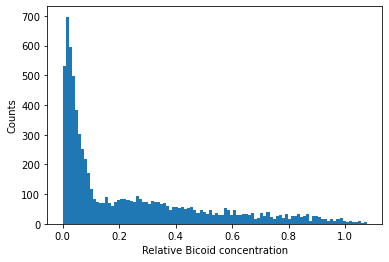

In [27]:
plt.figure()
plt.hist(TGB[:,mask].flatten(), 100)
plt.xlabel('Relative Bicoid concentration')
plt.ylabel('Counts')

# Histograms per position
# for i in range(np.argmax(meanTGB), 200, 20):
#     plt.figure()
#     plt.hist(TGB[:,i].flatten())

## Mutual information

In [31]:
sys.path.append('../Analysis/')

from MutualInformation import gaussian_conditional_probability_distributions, get_all_probability_distributions, calculate_mutual_information, calculate_entropy

1.0770404402829912


Text(0, 0.5, 'Mutual information')

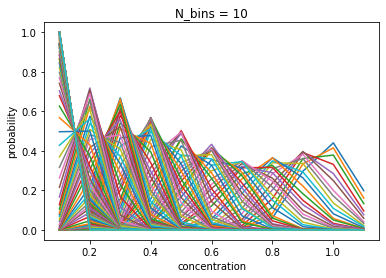

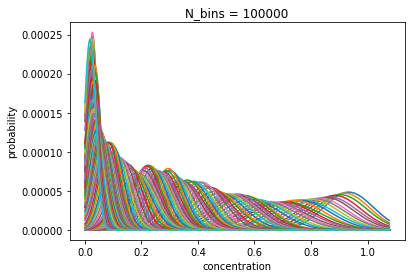

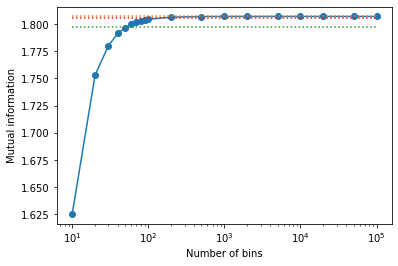

In [33]:
print(np.max(TGB[:,mask]))

N_bins_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
I = np.zeros(len(N_bins_list))
H = np.zeros(len(N_bins_list))

for i, N in enumerate(N_bins_list):
    #y_bins = np.linspace(0,1,N+1)
    #y_bins = np.linspace(0,1.1,round(1.1*N)+1)
    y_bins = np.arange(m.ceil(np.max(TGB[:,mask])*N)+1)/N
    #print(y_bins)
    P_htf_given_position = gaussian_conditional_probability_distributions(y_bins, list(zip(meanTGB[mask], varTGB[mask])))
    Ps = get_all_probability_distributions(P_htf_given_position)
    I[i] = calculate_mutual_information(Ps)
    H[i] = calculate_entropy(Ps[2])
    if (N == N_bins_list[0]) or (N == N_bins_list[-1]):
        plt.figure()
        plt.plot(y_bins[:-1]+1/N, Ps[0].T)
        plt.title(f'N_bins = {N}')
        plt.xlabel('concentration')
        plt.ylabel('probability')

plt.figure()
plt.semilogx(N_bins_list,I, 'o-')
plt.plot([N_bins_list[0], N_bins_list[-1]], [I[-1]]*2, ':')
plt.plot([N_bins_list[0], N_bins_list[-1]], [I[-1]-0.01]*2, ':')
plt.plot([N_bins_list[0], N_bins_list[-1]], [I[-1]-0.001]*2, ':')
#plt.semilogx(N_bins_list,H)
#plt.plot([N_bins_list[0], N_bins_list[-1]], [np.log2(len(xs))]*2, ':')
plt.xlabel('Number of bins')
plt.ylabel('Mutual information')